<a href="https://colab.research.google.com/github/sushil79g/60daysUdacity/blob/master/PROJECT%3Asentiment/sentiment_udacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving employee_reviews.csv to employee_reviews.csv


In [0]:
#numpy for mathmatical computation
import numpy as np
#pandas for dataframe computation i.e overall sql processing
import pandas as pd

In [3]:
#importing file with pandas
file = pd.read_csv('employee_reviews.csv')
#lets look @dataset
file.head(3)

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...


In [0]:
# lets chop out only important attribute for out project
imp_column = ['pros','cons','overall-ratings','summary']

In [0]:
our_dataset = file[imp_column]

In [6]:
our_dataset.head(5)

,pros,cons,overall-ratings,summary
0,People are smart and friendly,Bureaucracy is slowing things down,5.0,Best Company to work for
1,"1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,4.0,"Moving at the speed of light, burn out is inev..."
2,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",5.0,Great balance between big-company security and...
3,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,5.0,The best place I've worked and also the most d...
4,Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",5.0,"Unique, one of a kind dream job"


In [7]:
our_dataset['all_review'] = our_dataset['pros'] + our_dataset['cons'] + our_dataset['summary']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
import re #python module for regular expression
import nltk #python module for natural language processing
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
def remove_punctuation(x):
    line = re.sub(r'[^a-zA-Z ]+', ' ', str(x))
    return line

In [0]:
def remove_stopword(x):
    line = [word for word in x if not word in set(stopwords.words('english'))]
    return line

In [0]:
def conv_lower(x):
    new = []
    for item in x:
        new.append(item.lower())
    return new

In [12]:
nltk.download('wordnet')
lemma = nltk.wordnet.WordNetLemmatizer()
lemma.lemmatize('article')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
from textblob import TextBlob
def app_lamitz(x):
  try:
    words = x.split()
    result = []
    for wor in words:
      # print(nltk.pos_tag(wor)[0][1][0])
      if nltk.pos_tag(wor)[0][1][0]=='J':
        wor = lemma.lemmatize(wor)
#         print(wor)
      result.append(wor)
    value = ' '.join(result)
    b = TextBlob(value)
    return b.correct()
  except:
    b = TextBlob(x)
    return b.correct()

In [14]:
def preprocess_all_review(x):
    re_punct = remove_punctuation(x)
    re_stopword = remove_stopword(re_punct)
    line_lower = conv_lower(re_stopword)
    result = ' '.join(re_stopword)
    return line_lower
our_dataset['preprocess_review'] = our_dataset['all_review'].apply(preprocess_all_review)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [15]:
#another approch of doing
def preprocess_all_review(x):
    line = re.sub(r'[^a-zA-Z ]+', ' ', str(x))
    line = line.lower()
    line = line.split()
    line = [word for word in line if not word in set(stopwords.words('english'))]
    line = ' '.join(line)
    return line
our_dataset['preprocess_review'] = our_dataset['all_review'].apply(preprocess_all_review)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
our_dataset.head(5)

,pros,cons,overall-ratings,summary,all_review,preprocess_review
0,People are smart and friendly,Bureaucracy is slowing things down,5.0,Best Company to work for,People are smart and friendlyBureaucracy is sl...,people smart friendlybureaucracy slowing thing...
1,"1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,4.0,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",food food food cafes main campus mtv alone min...
2,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",5.0,Great balance between big-company security and...,"* If you're a software engineer, you're among ...",software engineer among kings hill google engi...
3,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,5.0,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,find well regarded company actually deserves h...
4,Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",5.0,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,google world every company lots people serious...


In [0]:
import seaborn as sns

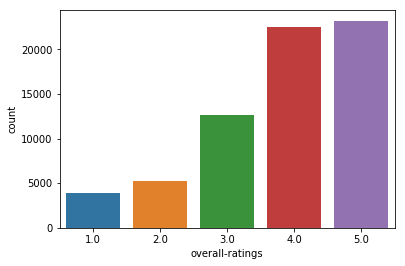

In [18]:
sns.countplot(x = 'overall-ratings', data=our_dataset)

In [0]:
import fastai
from fastai import *
from fastai.text import *
from functools import partial
import io
import os

In [0]:
file.drop('Unnamed: 0',axis=1,inplace=True)

In [32]:

# file= file.dropna(how='any',axis=0,inplace=True)
file.dropna(axis=0, how='any', inplace=True)
print(file.isna().sum())
file.head(3)

Unnamed: 0                    0
company                       0
location                      0
dates                         0
job-title                     0
summary                       0
pros                          0
cons                          0
advice-to-mgmt                0
overall-ratings               0
work-balance-stars            0
culture-values-stars          0
carrer-opportunities-stars    0
comp-benefit-stars            0
senior-mangemnet-stars        0
helpful-count                 0
link                          0
polarity                      0
dtype: int64


,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link,polarity
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...,positive
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...,positive
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...,positive


In [33]:
dataset = pd.DataFrame()
dataset['text'] = file['pros']
dataset['label'] = 'positive'
dataset.head()

,text,label
0,People are smart and friendly,positive
1,"1) Food, food, food. 15+ cafes on main campus ...",positive
2,"* If you're a software engineer, you're among ...",positive
3,You can't find a more well-regarded company th...,positive
4,Google is a world of its own. At every other c...,positive


In [0]:
neg_dataset = pd.DataFrame()
neg_dataset['text'] = file['cons']
neg_dataset['label'] = 'negative'

In [0]:
final_dataset = dataset.append(neg_dataset)

In [35]:
final_dataset = final_dataset.reindex_axis(['label','text','is_valid'], axis=1)
final_dataset.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """Entry point for launching an IPython kernel.


,label,text,is_valid
0,positive,people smart friendly,True
1,positive,food food food cafes main campus mtv alone min...,True
2,positive,software engineer among kings hill google engi...,True
3,positive,find well regarded company actually deserves h...,False
4,positive,google world every company lots people serious...,False


In [0]:
def preprocess_all_review(x):
    line = re.sub(r'[^a-zA-Z ]+', ' ', str(x))
    line = line.lower()
    line = line.split()
    line = [word for word in line if not word in set(stopwords.words('english'))]
    line = ' '.join(line)
    return line
final_dataset['text']=final_dataset['text'].apply(preprocess_all_review)

In [26]:
final_dataset['is_valid'].unique()

array([nan])

In [0]:
final_dataset['is_valid'] = 'False'
change = final_dataset.sample(27011).index
final_dataset.loc[change,'is_valid'] = 'True'

In [46]:
# file= file.dropna(how='any',axis=0,inplace=True)
final_dataset.dropna(axis=0, how='any', inplace=True)
print(final_dataset.isna().sum())
final_dataset.head(3)

label       0
text        0
is_valid    0
polarity    0
dtype: int64


,label,text,is_valid,polarity
0,positive,people smart friendly,True,positive
1,positive,food food food cafes main campus mtv alone min...,True,positive
2,positive,software engineer among kings hill google engi...,True,positive


In [0]:
def polar(x):
  if x>=3.0:
    return 'positive'
  else:
    return 'negative'
final_dataset['polarity'] = file['overall-ratings'].apply(polar)

In [0]:
final_dataset.to_csv('texts.csv')
data_lm = TextLMDataBunch.from_csv(csv_name='texts.csv',path='.',text_cols='text',label_cols='label')

In [0]:
data_clas = TextClasDataBunch.from_csv(csv_name='texts.csv',path='.',text_cols='text',label_cols='label', vocab=data_lm.train_ds.vocab, bs=32)

In [0]:
data_lm.save('data_lm_export.pkl')
data_clas.save('data_clas_export.pkl')

In [0]:
data_lm = load_data('.', 'data_lm_export.pkl')
data_clas = load_data('.', 'data_clas_export.pkl', bs=16)

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)
learn.fit_one_cycle(1, 1e-2)

In [0]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)

In [0]:
learn.predict("This is a review about", n_words=10)

In [0]:
learn.save_encoder('ft_enc')

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc')

In [0]:
learn.fit_one_cycle(1, 1e-2)

In [0]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))

In [0]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(2e-3/100, 2e-3))

In [0]:
print(' ')
learn.predict("i really do not like to work here")

(Category negative, tensor(0), tensor([0.8796, 0.1204]))

In [0]:
learn.predict("i have a mix feeling for this place")

(Category positive, tensor(1), tensor([0.4098, 0.5902]))

In [0]:
learn.predict('i am extremly overwhelmed by the treacherous and torrid journey to the eutopia where i found the splendid mesmerizing scenic canvas to color my dream')

(Category negative, tensor(0), tensor([0.7492, 0.2508]))

In [0]:
learn.predict('the girl with sweet smile and charismatic attitude makes my heart full of love for her')

(Category positive, tensor(1), tensor([0.2539, 0.7461]))